# emr-analysis demo

In [1]:
import os
import emr_analysis as emr

#### 1. Loading data

In [2]:
load = emr.data.Loader()
dfs = load('example')

In [3]:
for content_type, data in dfs.items():
    print(f'\nContent type = {content_type}')
    print(f'\t# rows = {len(data.index)}')
    print(f'\tColumns = {list(data.columns)}')


Content type = diagnosis
	# rows = 372
	Columns = ['PatientID', 'AdmissionID', 'PrimaryDiagnosisCode', 'PrimaryDiagnosisDescription']

Content type = admissions
	# rows = 372
	Columns = ['PatientID', 'AdmissionID', 'AdmissionStartDate', 'AdmissionEndDate']

Content type = labs
	# rows = 111483
	Columns = ['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'LabUnits', 'LabDateTime']

Content type = patients
	# rows = 100
	Columns = ['PatientID', 'PatientGender', 'PatientDateOfBirth', 'PatientRace', 'PatientMaritalStatus', 'PatientLanguage', 'PatientPopulationPercentageBelowPoverty']


In [4]:
dfs['admissions'].head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
1,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,1,1993-02-11 18:57:04.003,1993-02-24 17:22:29.713
2,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,2,2002-11-28 19:06:31.117,2002-12-04 19:14:40.797
3,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,3,2011-07-19 18:42:45.287,2011-07-25 04:57:42.053
4,886B5885-1EE2-49F3-98D5-A2F02EB8A9D4,1,1994-12-03 22:20:46.077,1994-12-20 20:24:56.010


In [5]:
dfs['diagnosis'].head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive"
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...


In [6]:
dfs['labs'].head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
2,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
3,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
4,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677


In [7]:
dfs['patients'].head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08
1,64182B95-EB72-4E2B-BE77-8050B71498CE,Male,1952-01-18 19:51:12.917,African American,Separated,English,13.03
2,DB22A4D9-7E4D-485C-916A-9CD1386507FB,Female,1970-07-25 13:04:20.717,Asian,Married,English,6.67
3,6E70D84D-C75F-477C-BC37-9177C3698C66,Male,1979-01-04 05:45:29.580,White,Married,English,16.09
4,C8556CC0-32FC-4CA5-A8CD-9CCF38816167,Female,1921-04-11 11:39:49.197,White,Married,English,18.20


#### 2. Summary statistics

In [19]:
summ_info = emr.summary.SummaryInformation(dfs)

(<Figure size 1080x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Number of admissions per year'}, xlabel='Date', ylabel='Admission Count'>)

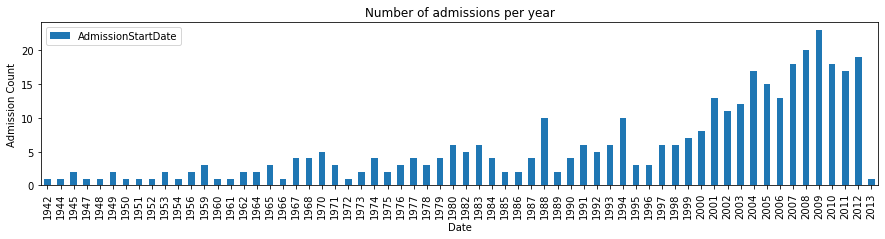

In [24]:
plot = summ_info.admissions_plot()
plot

In [25]:
lab_stats = summ_info.lab_summary()
lab_stats

LabValue                                \
                                          count        mean        std    min   
LabName                       LabUnits                                          
CBC: ABSOLUTE LYMPHOCYTES     %          3162.0   25.010183   5.811324   15.0   
CBC: ABSOLUTE NEUTROPHILS     %          3210.0   70.085265   5.766335   60.0   
CBC: BASOPHILS                k/cumm     3165.0    0.109763   0.073834    0.0   
CBC: EOSINOPHILS              k/cumm     3191.0    0.342557   0.154495    0.1   
CBC: HEMATOCRIT               %          3211.0   42.412924   7.197148   30.0   
CBC: HEMOGLOBIN               gm/dl      3193.0   14.446383   2.617442   10.0   
CBC: LYMPHOCYTES              k/cumm     3162.0    2.764485   1.310610    0.5   
CBC: MCH                      pg         3191.0   31.093826   5.195700   22.0   
CBC: MCHC                     g/dl       3202.0   34.089538   3.444835   28.0   
CBC: MEAN CORPUSCULAR VOLUME  fl         3175.0   85.253701   8.578679   70.0   
CBC: MONOCYTES                k/cumm     3129.0    0.630585   0.322327    0.1   
CBC: NEUTROPHILS              k/cumm     3224.0    6.151954   2.916712    1.0   
CBC: PLATELET COUNT           k/cumm     3177.0  282.266352  94.721581  120.0   
CBC: RDW                      %          3188.0   13.069260   2.271332    9.0   
CBC: RED BLOOD CELL COUNT     m/cumm     3174.0    5.001418   1.141430    3.0   
CBC: WHITE BLOOD CELL COUNT   k/cumm     3209.0    7.459614   2.588731    3.0   
METABOLIC: ALBUMIN            gm/dL      3202.0    4.262430   1.006354    2.5   
METABOLIC: ALK PHOS           U/L        3154.0   95.088744  31.952316   40.2   
METABOLIC: ALT/SGPT           U/L        3155.0   45.216989  17.326100   15.0   
METABOLIC: ANION GAP          mmol/L     3166.0   10.545989   4.363678    3.0   
METABOLIC: AST/SGOT           U/L        3179.0   27.062001   8.618117   12.0   
METABOLIC: BILI TOTAL         mg/dL      3182.0    0.599340   0.346577    0.0   
METABOLIC: BUN                mg/dL      3158.0   17.502407   7.189155    5.0   
METABOLIC: CALCIUM            mg/dL      3179.0    9.499214   1.442474    7.0   
METABOLIC: CARBON DIOXIDE     mmol/L     3218.0   26.911653   5.209798   18.0   
METABOLIC: CHLORIDE           mmol/L     3190.0  102.550972   7.134312   90.0   
METABOLIC: CREATININE         mg/dL      3193.0    0.851080   0.207351    0.5   
METABOLIC: GLUCOSE            mg/dL      3202.0  100.547939  23.013964   60.0   
METABOLIC: POTASSIUM          mmol/L     3184.0    4.510207   0.866821    3.0   
METABOLIC: SODIUM             mmol/L     3206.0  139.996538   8.789718  125.0   
METABOLIC: TOTAL PROTEIN      gm/dL      3177.0    7.502235   1.435070    5.0   
URINALYSIS: PH                no unit    3187.0    5.996360   0.855828    4.5   
URINALYSIS: RED BLOOD CELLS   rbc/hpf    3187.0    1.779322   1.013327    0.0   
URINALYSIS: SPECIFIC GRAVITY  no unit    3181.0    1.000000   0.000000    1.0   
URINALYSIS: WHITE BLOOD CELLS wbc/hpf    3218.0    3.002082   1.719924    0.0   

                                                                        
                                            25%    50%      75%    max  
LabName                       LabUnits                                  
CBC: ABSOLUTE LYMPHOCYTES     %          19.800   25.0   30.000   35.0  
CBC: ABSOLUTE NEUTROPHILS     %          65.100   70.3   74.900   80.0  
CBC: BASOPHILS                k/cumm      0.100    0.1    0.200    0.2  
CBC: EOSINOPHILS              k/cumm      0.200    0.3    0.500    0.6  
CBC: HEMATOCRIT               %          36.150   42.3   48.800   55.0  
CBC: HEMOGLOBIN               gm/dl      12.100   14.5   16.700   19.0  
CBC: LYMPHOCYTES              k/cumm      1.600    2.8    3.900    5.0  
CBC: MCH                      pg         26.600   31.0   35.600   40.0  
CBC: MCHC                     g/dl       31.200   34.1   37.100   40.0  
CBC: MEAN CORPUSCULAR VOLUME  fl         77.950   85.5   92.550  100.0  
CBC: MONOCY

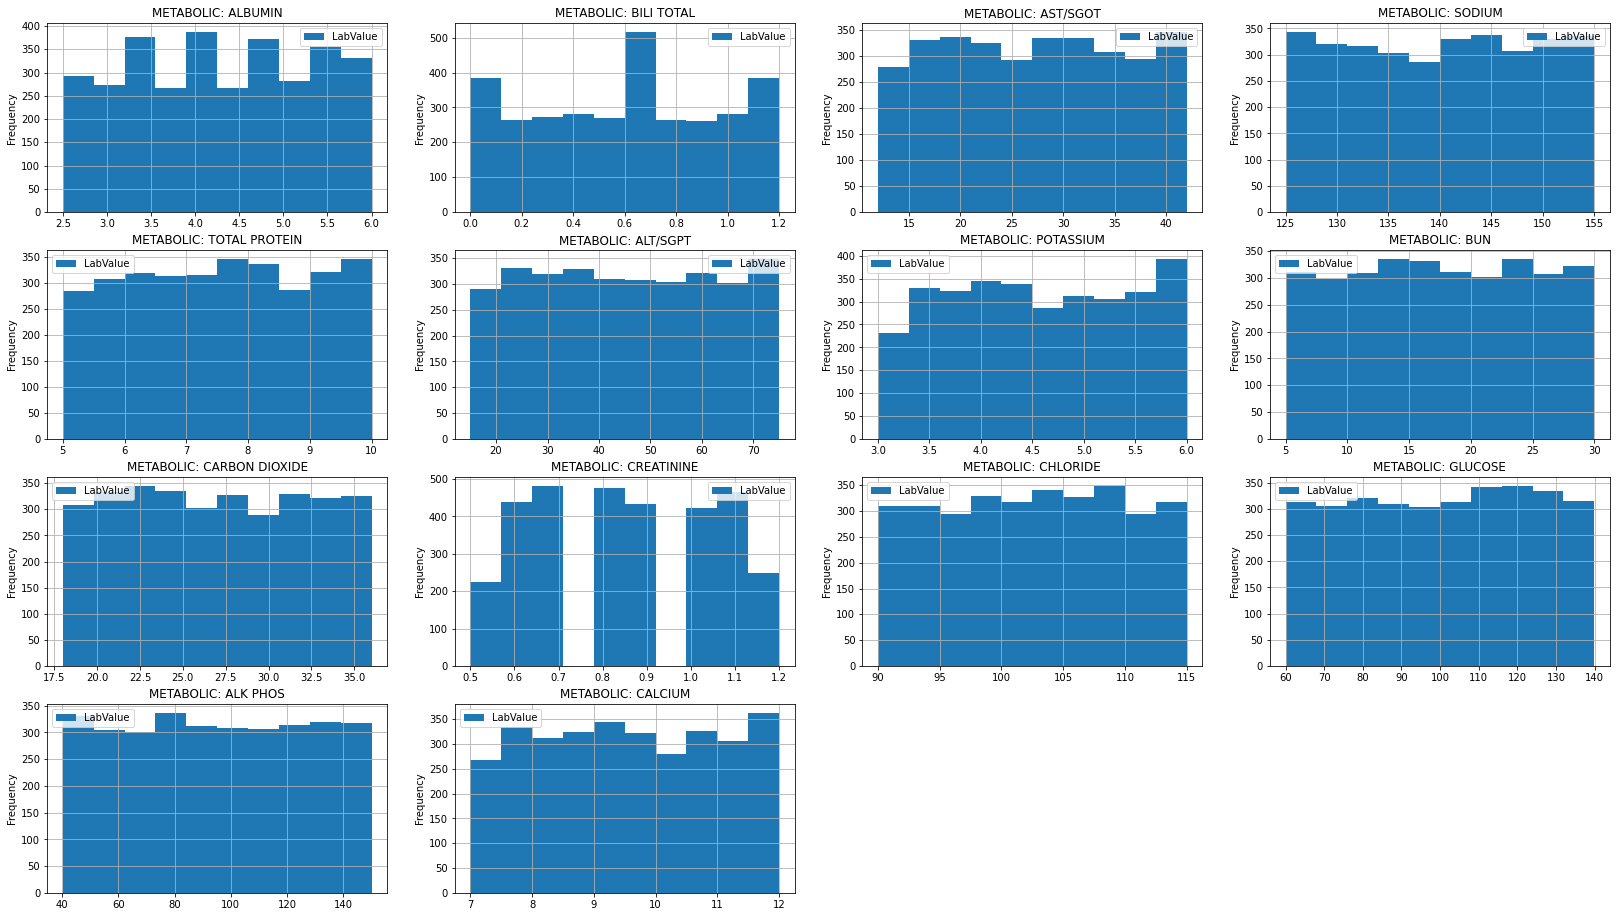

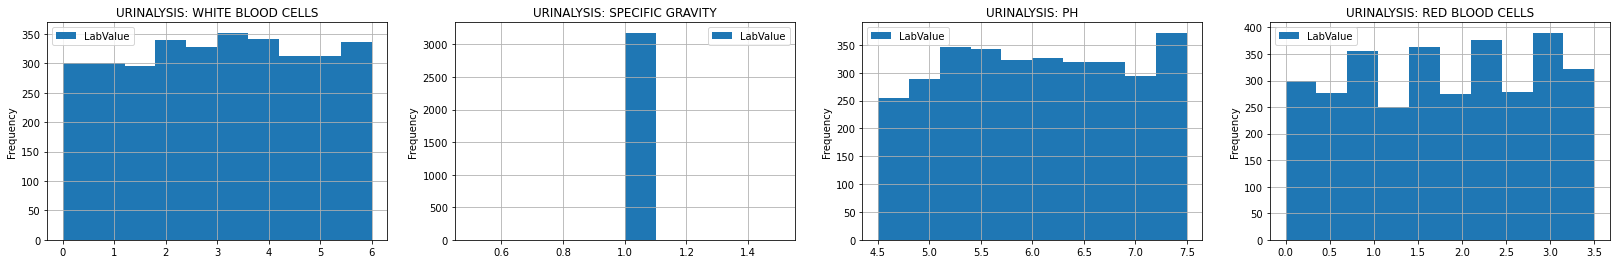

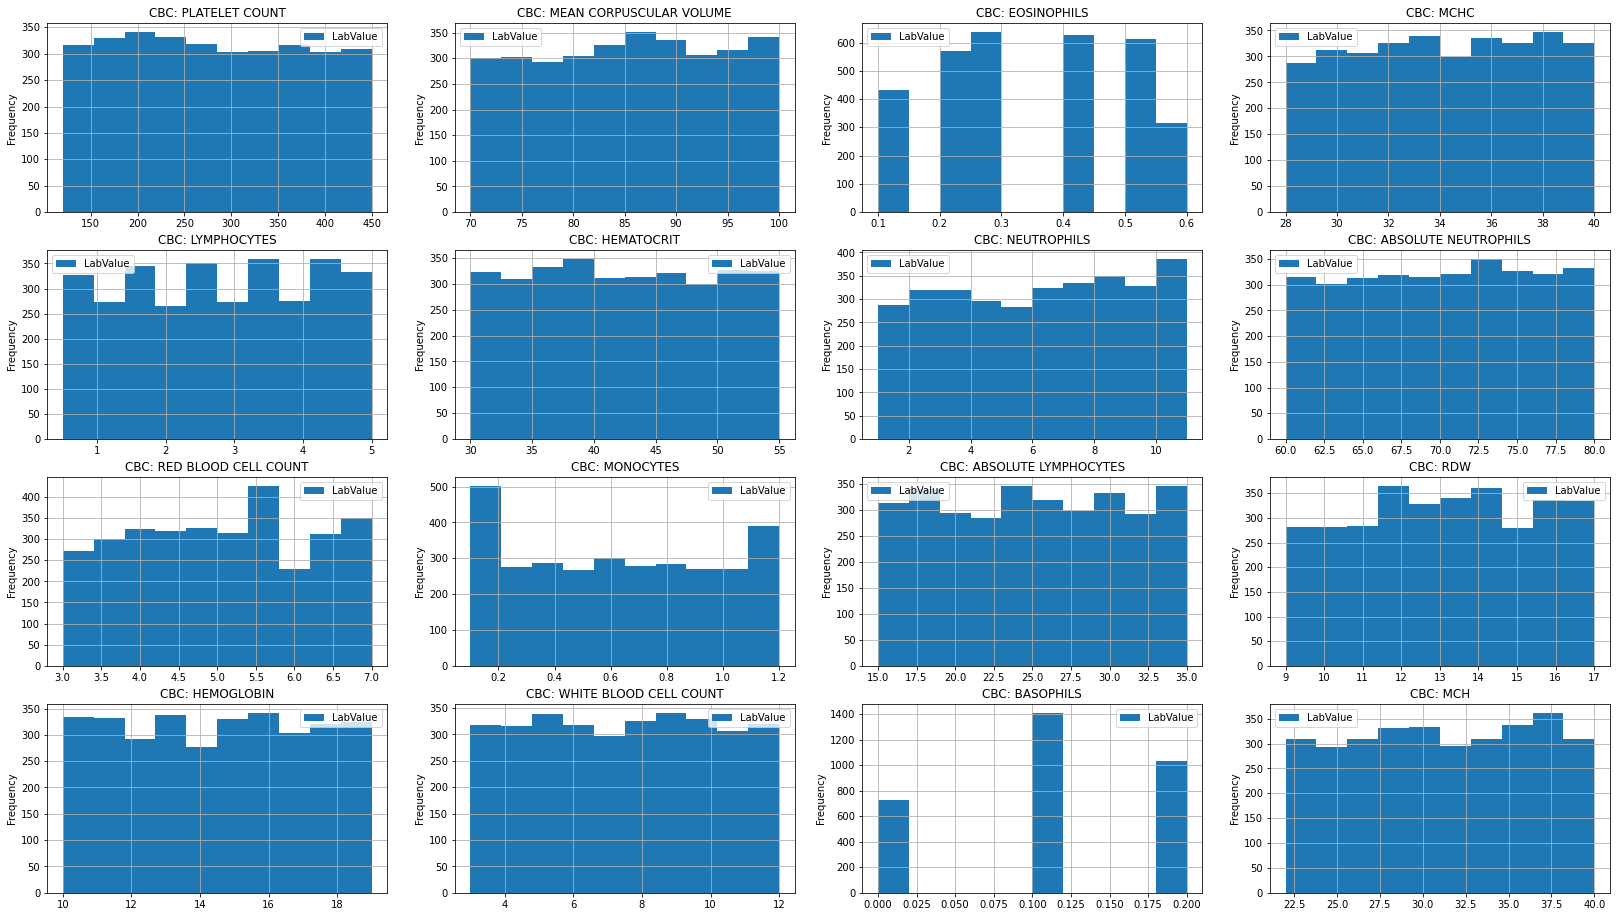

In [27]:
plots = summ_info.lab_plot()

#### 3. Get individual summary by PatientID

In [9]:
plots = emr.plot.IndSummary(dfs)

In [10]:
patient1_id = '1A8791E3-A61C-455A-8DEE-763EB90C9B2C'
patient1 = plots(patient1_id)

In [11]:
print(patient1['info'])

                          Patient_Info                                Values
0                                   ID  1A8791E3-A61C-455A-8DEE-763EB90C9B2C
1                               Gender                                  Male
2                                 Race                                 Asian
3                       Marital Status                                Single
4                             Language                               English
5  Population Percentage Below Poverty                                 13.97
6                             Birthday                            16/08/1973
7                        Time of Birth                       10:58:34.413000
8               Age (as of 11/01/2022)                                    48


In [12]:
patient1['plots']['CBC']

#### 4. Quicksearch

In [15]:
_ = emr.plot.QuickSearch(dfs)()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

INFO:Quick Search:Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'Quick Search' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
